In [36]:
import os
import pandas as pd
import plotly.express as px
import progressbar
import json
import numpy as np

## Get the paths and build table names for iteration

In [9]:
data_path = '../src/data'
mapping_corpus_path = data_path + r'/product/lspc2020_to_tablecorpus'
mapping_corpus_path_2 = data_path + r'/product/lspc2020_to_tablecorpus/Cleaned'
table_corpus_path = data_path + r'/product/product_top100/cleaned'
table_corpus_path_with_id = data_path + r'/product/product_top100/cleaned/with_id'
table_corpus_path2 = data_path + r'/product/product_minimum3/cleaned/with_id'

In [11]:
zip_files_mapping = [file for file in os.listdir(mapping_corpus_path_2) if file.endswith('.json.gz')]
zip_files_tables = [file for file in os.listdir(table_corpus_path) if file.endswith('.json.gz')]

In [62]:
zip_files_mapping

['map_to_tables_35.json.gz',
 'map_to_tables_279.json.gz',
 'map_to_tables_223.json.gz',
 'map_to_tables_182.json.gz',
 'map_to_tables_88.json.gz',
 'map_to_tables_27.json.gz',
 'map_to_tables_166.json.gz',
 'map_to_tables_321.json.gz',
 'map_to_tables_334.json.gz',
 'map_to_tables_211.json.gz',
 'map_to_tables_121.json.gz',
 'map_to_tables_104.json.gz',
 'map_to_tables_225.json.gz',
 'map_to_tables_76.json.gz',
 'map_to_tables_150.json.gz',
 'map_to_tables_160.json.gz',
 'map_to_tables_136.json.gz',
 'map_to_tables_254.json.gz',
 'map_to_tables_128.json.gz',
 'map_to_tables_147.json.gz',
 'map_to_tables_188.json.gz',
 'map_to_tables_24.json.gz',
 'map_to_tables_41.json.gz',
 'map_to_tables_165.json.gz',
 'map_to_tables_43.json.gz',
 'map_to_tables_174.json.gz',
 'map_to_tables_288.json.gz',
 'map_to_tables_261.json.gz',
 'map_to_tables_33.json.gz',
 'map_to_tables_197.json.gz',
 'map_to_tables_291.json.gz',
 'map_to_tables_155.json.gz',
 'map_to_tables_149.json.gz',
 'map_to_tables_18

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path2 + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path2_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

## Only use first cleaning step on cluster_id tables

#### Matching the cluster_ids to the entity tables Top100 did not result in good clusters, as the Top100 seem to be pretty specific regarding their input, e.g., amazonaws with aws-ids as products -> no matches somewhere else

In [ ]:
# # Use the 4 endings to search for english websites and then only keep these to get valid cluster_ids
# def clean_table(df):
#   valid_tld = ['.com', '.net', '.org', '.uk']
#   df['Valid']=0
#   for i in range(len(df)):
#     #print(i)
#     for tld in valid_tld:
#       if tld in df['table_id'][i]:
#         df['Valid'][i]=1
#   return df[df['Valid']==1]

In [ ]:
# #clean mapping files and save them again
# # then use the cleaned tables to append into a series and the get a dataframe from that
# count = 0
# count_1=0
# data=[]
# with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
#     for zip_file in zip_files_mapping:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
#         #df=clean_table(df)
#         #df['table_name']='{}'.format(zip_file)
#         #df.to_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         data.append(df)
#         count += 1
#         bar.update(count)
# #large_df= pd.concat(data, ignore_index=True)
# #large_df.to_json(os.path.join(mapping_corpus_path, 'concatentation'), compression='gzip', orient='records', lines=True)

In [ ]:
# #see the input of the series
# data

### Concat the series into a dataframe and then sort by the cluster_ids to get the table counts for each cluster

In [ ]:
# large_df= pd.concat(data, ignore_index=True)

In [ ]:
#table has around 28 Million valid cluster ids (not necessarily unique)
# large_df

## Filter on cluster_id and table_id to be easily able to count the table_ids per unique cluster

In [4]:
# get dictionaries
data_path_1 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_total_dict.json'
data_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_set_dict.json'

In [5]:
with open(data_path_1) as f:
    data_1=json.load(f)
with open(data_path_2) as f:
    data_2=json.load(f)

In [7]:
df_total=pd.DataFrame.from_dict(data_1, orient='index')
df_total

0
73924608  1
31326208  1
22544400  1
51904529  1
74055698  1
...      ..
14680043  1
6553589   1
20709366  1
75628536  1
72089597  1

[20916785 rows x 1 columns]

In [8]:
df_set=pd.DataFrame.from_dict(data_2, orient='index')
df_set

0
73924608  1
31326208  1
22544400  1
51904529  1
74055698  1
...      ..
14680043  1
6553589   1
20709366  1
75628536  1
72089597  1

[20916785 rows x 1 columns]

In [9]:
df_total=df_total.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})
df_set=df_set.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})

In [10]:
df_set.max()

index     9999996
Amount       1285
dtype: object

In [11]:
df_total.max()

index     9999996
Amount       2600
dtype: object

In [12]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set=df_set[df_set['Amount']>1]
df_set

index  Amount
5           131092      29
9          4980762       4
25        17694777       2
27         2490427       9
28         4980796       2
...            ...     ...
20852522  55847403       2
20887842   2436046       2
20892455    740855       2
20900059   2721215       2
20903836  26976540       2

[1244562 rows x 2 columns]

In [13]:
df_set.set_index('cluster_id').describe().T.round()

count  mean   std  min  25%  50%  75%     max
Amount  1244562.0   4.0  11.0  2.0  2.0  2.0  3.0  1285.0

<AxesSubplot:ylabel='Frequency'>

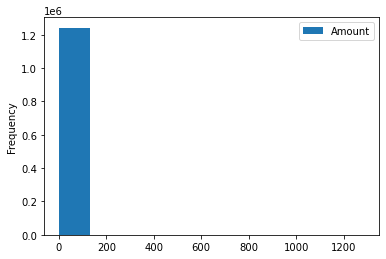

In [16]:
df_set.plot(x='cluster_id',y='Amount',kind='hist')

In [17]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_15=df_set[df_set['Amount']>15]
df_15

cluster_id  Amount
5            131092      29
30         47710279      42
201         2621903      33
642          787983      18
646         1050139      16
...             ...     ...
8306446    65770080      17
8780123    19170901      17
9040570    58582000      16
9429552    19412215      17
11139359    5381269      16

[19367 rows x 2 columns]

In [19]:
df_15.set_index('cluster_id').describe().T.round()

count  mean   std   min   25%   50%   75%     max
Amount  19367.0  59.0  69.0  16.0  22.0  33.0  63.0  1285.0

<AxesSubplot:ylabel='Frequency'>

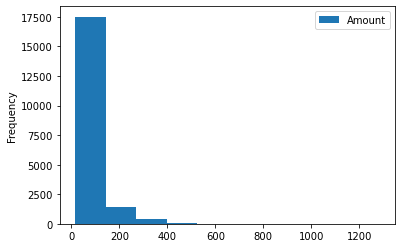

In [20]:
df_15.plot(x='cluster_id',y='Amount',kind='hist')

In [21]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_150=df_set[df_set['Amount']>150]
df_150

cluster_id  Amount
696       63047326     158
729       26085086     162
1001      59902335     185
1406      47320529     156
1584      24252278     176
...            ...     ...
1082271    5388699     172
1093363   63881368     174
1192604   40071639     154
1198138   72856662     202
1299638      35389     181

[1608 rows x 2 columns]

In [22]:
df_150.set_index('cluster_id').describe().T.round()

count   mean   std    min    25%    50%    75%     max
Amount  1608.0  242.0  99.0  151.0  171.0  205.0  280.0  1285.0

<AxesSubplot:ylabel='Frequency'>

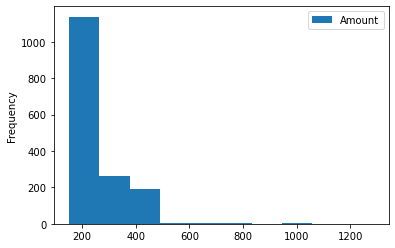

In [23]:
df_150.plot(x='cluster_id',y='Amount',kind='hist')

In [25]:
df_15_500=df_15[df_15['Amount']<500]

<AxesSubplot:ylabel='Frequency'>

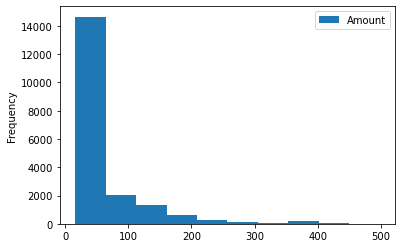

In [27]:
df_15_500.plot(x='cluster_id',y='Amount',kind='hist')

## Match the number dictionaries with the information about the brand

In [2]:
# get dictionaries
electronics_path = '../src/data/product/product_electronics/electronics_dict.json'
clothes_path = '../src/data/product/product_clothes/clothes_dict.json'
mapping_corpus_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned'

In [3]:
with open(electronics_path) as f:
    electronics_data=json.load(f)
# with open(clothes_path) as f:
#     clothes_data=json.load(f)

In [5]:
electronics_data

{'top100/cleaned': {'nvidia': [['Product_alibaba.com_September2020.json.gz',
    46821],
   ['Product_alibaba.com_September2020.json.gz', 53588],
   ['Product_alibaba.com_September2020.json.gz', 59834],
   ['Product_varagesale.com_September2020.json.gz', 12186],
   ['Product_varagesale.com_September2020.json.gz', 19568],
   ['Product_varagesale.com_September2020.json.gz', 21370],
   ['Product_varagesale.com_September2020.json.gz', 21485],
   ['Product_varagesale.com_September2020.json.gz', 21705],
   ['Product_dell.com_September2020.json.gz', 703],
   ['Product_dell.com_September2020.json.gz', 1485],
   ['Product_dell.com_September2020.json.gz', 2912],
   ['Product_dell.com_September2020.json.gz', 3700],
   ['Product_dell.com_September2020.json.gz', 5059],
   ['Product_dell.com_September2020.json.gz', 5191],
   ['Product_dell.com_September2020.json.gz', 5204],
   ['Product_dell.com_September2020.json.gz', 10872],
   ['Product_dell.com_September2020.json.gz', 11381],
   ['Product_dell.c

In [51]:
cleaned_dictionary={}
for value in electronics_data.values():
    cleaned_dictionary.update(value)
cleaned_dictionary

{'nvidia': [['Product_teklobby.com_September2020.json.gz', 164],
  ['Product_pcgamertechstore.com_September2020.json.gz', 3],
  ['Product_pcgamertechstore.com_September2020.json.gz', 14],
  ['Product_pcgamertechstore.com_September2020.json.gz', 16],
  ['Product_pcgamertechstore.com_September2020.json.gz', 17],
  ['Product_pcgamertechstore.com_September2020.json.gz', 18],
  ['Product_pcgamertechstore.com_September2020.json.gz', 20],
  ['Product_pcgamertechstore.com_September2020.json.gz', 24],
  ['Product_pcgamertechstore.com_September2020.json.gz', 25],
  ['Product_pcgamertechstore.com_September2020.json.gz', 30],
  ['Product_pcgamertechstore.com_September2020.json.gz', 33],
  ['Product_macbook.com.vn_September2020.json.gz', 250],
  ['Product_macbook.com.vn_September2020.json.gz', 286],
  ['Product_games2egypt.com_September2020.json.gz', 605],
  ['Product_linkproved.com_September2020.json.gz', 925],
  ['Product_ebay.co.uk_September2020.json.gz', 1316],
  ['Product_ebay.co.uk_September2

In [55]:
df_electronics=pd.DataFrame.from_dict(cleaned_dictionary, orient='index')
#drop empty rows
df_electronics.dropna(how='all', inplace=True)
df_electronics
# df_clothes=pd.DataFrame.from_dict(clothes_data, orient='index')

0      \
nvidia                      [Product_teklobby.com_September2020.json.gz, 164]   
xiaomi                       [Product_teklobby.com_September2020.json.gz, 75]   
roku                        [Product_bestdamnnetwork.com_September2020.jso...   
lenovo                      [Product_likenewpcs.com_September2020.json.gz,...   
delta electronics           [Product_buffalocomputerparts.com_September202...   
lg electronics              [Product_linkproved.com_September2020.json.gz,...   
hubbell                     [Product_azhomesold.com_September2020.json.gz,...   
hikvision                     [Product_oxranka.com_September2020.json.gz, 63]   
maxim integrated              [Product_hotenda.com_September2020.json.gz, 21]   
vicor                       [Product_newproductsgreatdeals.com_September20...   
sony                        [Product_teklobby.com_September2020.json.gz, 137]   
omron                         [Product_ebay.co.uk_September2020.json.gz, 893]   
heico                       [Product_homebytea.com_September2020.json.gz, ...   
gopro                       [Product_goldstaronboard.com_September2020.jso...   
nikon                       [Product_teklobby.com_September2020.json.gz, 121]   
arista networks             [Product_nwremarketing.com_September2020.json....   
apple                       [Product_uppolomallets.com_September2020.json....   
te connectivity             [Product_fiberoptics4sale.com_September2020.js...   
hp                          [Product_officecentralinteriors.com_September2...   
lg display                   [Product_pro-lcds.com_September2020.json.gz, 61]   
dell technologies           [Product_shopboxdeals.com_September2020.json.g...   
tokyo electron              [Product_semiconductorspares.com_September2020...   
knowles                     [Product_arhsnsw.com.au_September2020.json.gz,...   
nintendo                    [Product_customrapid.com_September2020.json.gz...   
foxconn                     [Product_bargainhardware.co.uk_September2020.j...   
seagate technology          [Product_shopboxdeals.com_September2020.json.g...   
amd                          [Product_twenergy.com_September2020.json.gz, 37]   
tdk                         [Product_unifiedgoods.com_September2020.json.g...   
ubiquiti                    [Product_untanglednetworks.com_September2020.j...   
asus                        [Product_tamquangthinh.com_September2020.json....   
veeco                            [Product_avac.com_September2020.json.gz, 75]   
hitachi                     [Product_thebladerunner.com.au_September2020.j...   
ametek                      [Product_householdtrends.com_September2020.jso...   
samsung                     [Product_lorexpromos.com_September2020.json.gz...   
resonant                    [Product_einsteindeals.com_September2020.json....   
aterian                        [Product_ugems.com_September2020.json.gz, 574]   
flex                        [Product_officecentralinteriors.com_September2...   
plantronics                   [Product_leverify.com_September2020.json.gz, 3]   
samsung electronics         [Product_californiasecuritylicense.com_Septemb...   
supermicro                    [Product_ebay.co.uk_September2020.json.gz, 743]   
zebra technologies            [Product_dealzpc.com_September2020.json.gz, 81]   
panasonic                   [Product_planetbike.com_September2020.json.gz,...   
yaskawa                     [Product_spartancontrols.com_September2020.jso...   
honeywell international     [Product_southernreeloutfitters.com_September2...   
hewlett packard enterprise  [Product_shopboxdeals.com_September2020.json.g...   
intel                       [Product_likenewpcs.com_September2020.json.gz, 0]   
vtech                       [Product_housingunits.co.uk_September2020.json...   
mitsubishi electric         [Product_energopanel.com_September2020.json.gz...   
canon                       [Product_owens-originals.com_September2020.jso...   
dell                  

In [71]:
# use the cleaned tables to append into a series and the get a dataframe from that
count = 0
data=[]
with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
    for zip_file in zip_files_mapping:
        print('/{}'.format(zip_file))
        df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
        data.append(df)
        count += 1
        bar.update(count)
df_large= pd.concat(data, ignore_index=True)
#df.large.to_json(os.path.join(mapping_corpus_path_2, 'concatentation'), compression='gzip', orient='records', lines=True)

/map_to_tables_35.json.gz


  0% (0 of 359) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

/map_to_tables_279.json.gz


  0% (2 of 359) |                        | Elapsed Time: 0:00:00 ETA:   0:01:24

/map_to_tables_223.json.gz


  0% (3 of 359) |                        | Elapsed Time: 0:00:00 ETA:   0:01:23

/map_to_tables_182.json.gz


  1% (4 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:39

/map_to_tables_88.json.gz


  1% (5 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:35

/map_to_tables_27.json.gz


  1% (6 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:32

/map_to_tables_166.json.gz


  1% (7 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:31

/map_to_tables_321.json.gz


  2% (8 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:01:30

/map_to_tables_334.json.gz


  2% (9 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:01:40

/map_to_tables_211.json.gz


  2% (10 of 359) |                       | Elapsed Time: 0:00:02 ETA:   0:01:40

/map_to_tables_121.json.gz


  3% (11 of 359) |                       | Elapsed Time: 0:00:02 ETA:   0:01:37

/map_to_tables_104.json.gz


  3% (12 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:01:29

/map_to_tables_225.json.gz


  3% (13 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:01:29

/map_to_tables_76.json.gz


  3% (14 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:01:29

/map_to_tables_150.json.gz


  4% (15 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:01:28

/map_to_tables_160.json.gz


  4% (16 of 359) |#                      | Elapsed Time: 0:00:04 ETA:   0:01:28

/map_to_tables_136.json.gz


  4% (17 of 359) |#                      | Elapsed Time: 0:00:04 ETA:   0:01:27

/map_to_tables_254.json.gz


  5% (18 of 359) |#                      | Elapsed Time: 0:00:04 ETA:   0:01:28

/map_to_tables_128.json.gz


  5% (19 of 359) |#                      | Elapsed Time: 0:00:05 ETA:   0:01:37

/map_to_tables_147.json.gz


  5% (20 of 359) |#                      | Elapsed Time: 0:00:05 ETA:   0:01:46

/map_to_tables_188.json.gz


  5% (21 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:02:00

/map_to_tables_24.json.gz


  6% (22 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:02:19

/map_to_tables_41.json.gz


  6% (23 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:02:09

/map_to_tables_165.json.gz


  6% (24 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:01:57

/map_to_tables_43.json.gz


  6% (25 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:01:51

/map_to_tables_174.json.gz


  7% (26 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:01:43

/map_to_tables_288.json.gz


  7% (27 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:01:39

/map_to_tables_261.json.gz


  7% (28 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:01:39

/map_to_tables_33.json.gz


  8% (29 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:01:39

/map_to_tables_197.json.gz


  8% (30 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:01:31

/map_to_tables_291.json.gz


  8% (31 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:01:33

/map_to_tables_155.json.gz


  8% (32 of 359) |##                     | Elapsed Time: 0:00:09 ETA:   0:01:42

/map_to_tables_149.json.gz


  9% (33 of 359) |##                     | Elapsed Time: 0:00:09 ETA:   0:01:55

/map_to_tables_186.json.gz


  9% (34 of 359) |##                     | Elapsed Time: 0:00:09 ETA:   0:01:49

/map_to_tables_183.json.gz


  9% (35 of 359) |##                     | Elapsed Time: 0:00:10 ETA:   0:01:48

/map_to_tables_153.json.gz


 10% (36 of 359) |##                     | Elapsed Time: 0:00:10 ETA:   0:01:54

/map_to_tables_168.json.gz


 10% (37 of 359) |##                     | Elapsed Time: 0:00:11 ETA:   0:02:03

/map_to_tables_18.json.gz


 10% (38 of 359) |##                     | Elapsed Time: 0:00:11 ETA:   0:02:02

/map_to_tables_343.json.gz


 10% (39 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:11

/map_to_tables_355.json.gz


 11% (40 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:01

/map_to_tables_270.json.gz


 11% (41 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:01

/map_to_tables_130.json.gz


 11% (42 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:01:51

/map_to_tables_98.json.gz


 11% (43 of 359) |##                     | Elapsed Time: 0:00:13 ETA:   0:01:45

/map_to_tables_55.json.gz


 12% (44 of 359) |##                     | Elapsed Time: 0:00:13 ETA:   0:01:37

/map_to_tables_306.json.gz


 12% (45 of 359) |##                     | Elapsed Time: 0:00:13 ETA:   0:01:34

/map_to_tables_207.json.gz


 12% (46 of 359) |##                     | Elapsed Time: 0:00:14 ETA:   0:01:29

/map_to_tables_77.json.gz


 13% (47 of 359) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:29

/map_to_tables_212.json.gz


 13% (48 of 359) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:27

/map_to_tables_92.json.gz


 13% (49 of 359) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:19

/map_to_tables_352.json.gz


 13% (50 of 359) |###                    | Elapsed Time: 0:00:15 ETA:   0:01:28

/map_to_tables_69.json.gz


 14% (51 of 359) |###                    | Elapsed Time: 0:00:15 ETA:   0:01:28

/map_to_tables_213.json.gz


 14% (52 of 359) |###                    | Elapsed Time: 0:00:15 ETA:   0:01:35

/map_to_tables_79.json.gz


 14% (53 of 359) |###                    | Elapsed Time: 0:00:16 ETA:   0:01:32

/map_to_tables_287.json.gz


 15% (54 of 359) |###                    | Elapsed Time: 0:00:16 ETA:   0:01:24

/map_to_tables_269.json.gz


 15% (55 of 359) |###                    | Elapsed Time: 0:00:16 ETA:   0:01:34

/map_to_tables_313.json.gz


 15% (56 of 359) |###                    | Elapsed Time: 0:00:17 ETA:   0:01:42

/map_to_tables_286.json.gz


 15% (57 of 359) |###                    | Elapsed Time: 0:00:17 ETA:   0:01:34

/map_to_tables_132.json.gz


 16% (58 of 359) |###                    | Elapsed Time: 0:00:17 ETA:   0:01:33

/map_to_tables_200.json.gz


 16% (59 of 359) |###                    | Elapsed Time: 0:00:17 ETA:   0:01:30

/map_to_tables_323.json.gz


 16% (60 of 359) |###                    | Elapsed Time: 0:00:18 ETA:   0:01:25

/map_to_tables_102.json.gz


 16% (61 of 359) |###                    | Elapsed Time: 0:00:18 ETA:   0:01:25

/map_to_tables_161.json.gz


 17% (62 of 359) |###                    | Elapsed Time: 0:00:18 ETA:   0:01:23

/map_to_tables_5.json.gz


 17% (63 of 359) |####                   | Elapsed Time: 0:00:18 ETA:   0:01:16

/map_to_tables_278.json.gz


 17% (64 of 359) |####                   | Elapsed Time: 0:00:19 ETA:   0:01:16

/map_to_tables_325.json.gz


 18% (65 of 359) |####                   | Elapsed Time: 0:00:19 ETA:   0:01:15

/map_to_tables_96.json.gz


 18% (66 of 359) |####                   | Elapsed Time: 0:00:19 ETA:   0:01:15

/map_to_tables_297.json.gz


 18% (67 of 359) |####                   | Elapsed Time: 0:00:20 ETA:   0:01:24

/map_to_tables_53.json.gz


 18% (68 of 359) |####                   | Elapsed Time: 0:00:20 ETA:   0:01:23

/map_to_tables_218.json.gz


 19% (69 of 359) |####                   | Elapsed Time: 0:00:20 ETA:   0:01:30

/map_to_tables_359.json.gz


 19% (70 of 359) |####                   | Elapsed Time: 0:00:20 ETA:   0:01:30

/map_to_tables_74.json.gz


 19% (71 of 359) |####                   | Elapsed Time: 0:00:21 ETA:   0:01:22

/map_to_tables_342.json.gz


 20% (72 of 359) |####                   | Elapsed Time: 0:00:21 ETA:   0:01:22

/map_to_tables_151.json.gz


 20% (73 of 359) |####                   | Elapsed Time: 0:00:21 ETA:   0:01:22

/map_to_tables_101.json.gz


 20% (74 of 359) |####                   | Elapsed Time: 0:00:21 ETA:   0:01:20

/map_to_tables_241.json.gz


 20% (75 of 359) |####                   | Elapsed Time: 0:00:22 ETA:   0:01:21

/map_to_tables_308.json.gz


 21% (76 of 359) |####                   | Elapsed Time: 0:00:22 ETA:   0:01:21

/map_to_tables_326.json.gz


 21% (77 of 359) |####                   | Elapsed Time: 0:00:23 ETA:   0:01:28

/map_to_tables_158.json.gz


 21% (78 of 359) |####                   | Elapsed Time: 0:00:23 ETA:   0:01:28

/map_to_tables_143.json.gz


 22% (79 of 359) |#####                  | Elapsed Time: 0:00:23 ETA:   0:01:40

/map_to_tables_240.json.gz


 22% (80 of 359) |#####                  | Elapsed Time: 0:00:24 ETA:   0:01:39

/map_to_tables_318.json.gz


 22% (81 of 359) |#####                  | Elapsed Time: 0:00:24 ETA:   0:01:34

/map_to_tables_124.json.gz


 22% (82 of 359) |#####                  | Elapsed Time: 0:00:24 ETA:   0:01:33

/map_to_tables_81.json.gz


 23% (83 of 359) |#####                  | Elapsed Time: 0:00:24 ETA:   0:01:26

/map_to_tables_332.json.gz


 23% (84 of 359) |#####                  | Elapsed Time: 0:00:25 ETA:   0:01:22

/map_to_tables_252.json.gz


 23% (85 of 359) |#####                  | Elapsed Time: 0:00:25 ETA:   0:01:25

/map_to_tables_118.json.gz


 23% (86 of 359) |#####                  | Elapsed Time: 0:00:25 ETA:   0:01:18

/map_to_tables_80.json.gz


 24% (87 of 359) |#####                  | Elapsed Time: 0:00:26 ETA:   0:01:17

/map_to_tables_320.json.gz


 24% (88 of 359) |#####                  | Elapsed Time: 0:00:26 ETA:   0:01:17

/map_to_tables_172.json.gz


 24% (89 of 359) |#####                  | Elapsed Time: 0:00:26 ETA:   0:01:15

/map_to_tables_285.json.gz


 25% (90 of 359) |#####                  | Elapsed Time: 0:00:26 ETA:   0:01:17

/map_to_tables_135.json.gz


 25% (91 of 359) |#####                  | Elapsed Time: 0:00:27 ETA:   0:01:17

/map_to_tables_199.json.gz


 25% (92 of 359) |#####                  | Elapsed Time: 0:00:27 ETA:   0:01:16

/map_to_tables_11.json.gz


 25% (93 of 359) |#####                  | Elapsed Time: 0:00:27 ETA:   0:01:23

/map_to_tables_38.json.gz


 26% (94 of 359) |######                 | Elapsed Time: 0:00:28 ETA:   0:01:34

/map_to_tables_273.json.gz


 26% (95 of 359) |######                 | Elapsed Time: 0:00:28 ETA:   0:01:33

/map_to_tables_47.json.gz


 26% (96 of 359) |######                 | Elapsed Time: 0:00:29 ETA:   0:01:33

/map_to_tables_70.json.gz


 27% (97 of 359) |######                 | Elapsed Time: 0:00:29 ETA:   0:01:33

/map_to_tables_181.json.gz


 27% (98 of 359) |######                 | Elapsed Time: 0:00:29 ETA:   0:01:28

/map_to_tables_202.json.gz


 27% (99 of 359) |######                 | Elapsed Time: 0:00:29 ETA:   0:01:21

/map_to_tables_108.json.gz


 27% (100 of 359) |######                | Elapsed Time: 0:00:29 ETA:   0:01:14

/map_to_tables_8.json.gz


 28% (101 of 359) |######                | Elapsed Time: 0:00:30 ETA:   0:01:12

/map_to_tables_242.json.gz


 28% (102 of 359) |######                | Elapsed Time: 0:00:30 ETA:   0:01:07

/map_to_tables_290.json.gz


 28% (103 of 359) |######                | Elapsed Time: 0:00:30 ETA:   0:01:06

/map_to_tables_239.json.gz


 28% (104 of 359) |######                | Elapsed Time: 0:00:31 ETA:   0:01:06

/map_to_tables_176.json.gz


 29% (105 of 359) |######                | Elapsed Time: 0:00:31 ETA:   0:01:06

/map_to_tables_137.json.gz


 29% (106 of 359) |######                | Elapsed Time: 0:00:31 ETA:   0:01:05

/map_to_tables_303.json.gz


 29% (107 of 359) |######                | Elapsed Time: 0:00:32 ETA:   0:01:13

/map_to_tables_184.json.gz


 30% (108 of 359) |######                | Elapsed Time: 0:00:32 ETA:   0:01:19

/map_to_tables_54.json.gz


 30% (109 of 359) |######                | Elapsed Time: 0:00:32 ETA:   0:01:18

/map_to_tables_51.json.gz


 30% (110 of 359) |######                | Elapsed Time: 0:00:32 ETA:   0:01:18

/map_to_tables_103.json.gz


 30% (111 of 359) |######                | Elapsed Time: 0:00:33 ETA:   0:01:10

/map_to_tables_233.json.gz


 31% (112 of 359) |######                | Elapsed Time: 0:00:33 ETA:   0:01:10

/map_to_tables_316.json.gz


 31% (113 of 359) |######                | Elapsed Time: 0:00:33 ETA:   0:01:10

/map_to_tables_156.json.gz


 31% (114 of 359) |######                | Elapsed Time: 0:00:33 ETA:   0:01:08

/map_to_tables_277.json.gz


 32% (115 of 359) |#######               | Elapsed Time: 0:00:34 ETA:   0:01:02

/map_to_tables_133.json.gz


 32% (116 of 359) |#######               | Elapsed Time: 0:00:34 ETA:   0:01:01

/map_to_tables_255.json.gz


 32% (117 of 359) |#######               | Elapsed Time: 0:00:34 ETA:   0:00:56

/map_to_tables_129.json.gz


 32% (118 of 359) |#######               | Elapsed Time: 0:00:34 ETA:   0:00:57

/map_to_tables_230.json.gz


 33% (119 of 359) |#######               | Elapsed Time: 0:00:35 ETA:   0:00:56

/map_to_tables_191.json.gz


 33% (120 of 359) |#######               | Elapsed Time: 0:00:35 ETA:   0:01:02

/map_to_tables_62.json.gz


 33% (121 of 359) |#######               | Elapsed Time: 0:00:35 ETA:   0:01:01

/map_to_tables_282.json.gz


 33% (122 of 359) |#######               | Elapsed Time: 0:00:36 ETA:   0:01:08

/map_to_tables_15.json.gz


 34% (123 of 359) |#######               | Elapsed Time: 0:00:36 ETA:   0:01:08

/map_to_tables_180.json.gz


 34% (124 of 359) |#######               | Elapsed Time: 0:00:36 ETA:   0:01:13

/map_to_tables_219.json.gz


 35% (126 of 359) |#######               | Elapsed Time: 0:00:37 ETA:   0:01:14

/map_to_tables_263.json.gz
/map_to_tables_144.json.gz


 35% (127 of 359) |#######               | Elapsed Time: 0:00:37 ETA:   0:01:17

/map_to_tables_195.json.gz


 35% (128 of 359) |#######               | Elapsed Time: 0:00:37 ETA:   0:01:13

/map_to_tables_260.json.gz


 35% (129 of 359) |#######               | Elapsed Time: 0:00:38 ETA:   0:01:07

/map_to_tables_341.json.gz


 36% (130 of 359) |#######               | Elapsed Time: 0:00:38 ETA:   0:01:13

/map_to_tables_16.json.gz


 36% (131 of 359) |########              | Elapsed Time: 0:00:38 ETA:   0:01:07

/map_to_tables_13.json.gz


 36% (132 of 359) |########              | Elapsed Time: 0:00:39 ETA:   0:01:07

/map_to_tables_310.json.gz


 37% (133 of 359) |########              | Elapsed Time: 0:00:39 ETA:   0:01:10

/map_to_tables_127.json.gz


 37% (134 of 359) |########              | Elapsed Time: 0:00:39 ETA:   0:01:10

/map_to_tables_258.json.gz


 37% (135 of 359) |########              | Elapsed Time: 0:00:40 ETA:   0:01:20

/map_to_tables_44.json.gz


 37% (136 of 359) |########              | Elapsed Time: 0:00:40 ETA:   0:01:19

/map_to_tables_141.json.gz


 38% (137 of 359) |########              | Elapsed Time: 0:00:41 ETA:   0:01:25

/map_to_tables_58.json.gz


 38% (138 of 359) |########              | Elapsed Time: 0:00:41 ETA:   0:01:32

/map_to_tables_75.json.gz


 38% (139 of 359) |########              | Elapsed Time: 0:00:41 ETA:   0:01:31

/map_to_tables_107.json.gz


 38% (140 of 359) |########              | Elapsed Time: 0:00:42 ETA:   0:01:31

/map_to_tables_237.json.gz


 39% (141 of 359) |########              | Elapsed Time: 0:00:42 ETA:   0:01:31

/map_to_tables_229.json.gz


 39% (142 of 359) |########              | Elapsed Time: 0:00:43 ETA:   0:01:24

/map_to_tables_125.json.gz


 39% (143 of 359) |########              | Elapsed Time: 0:00:43 ETA:   0:01:17

/map_to_tables_26.json.gz


 40% (144 of 359) |########              | Elapsed Time: 0:00:43 ETA:   0:01:17

/map_to_tables_217.json.gz


 40% (145 of 359) |########              | Elapsed Time: 0:00:44 ETA:   0:01:17

/map_to_tables_56.json.gz


 40% (146 of 359) |########              | Elapsed Time: 0:00:44 ETA:   0:01:12

/map_to_tables_350.json.gz


 40% (147 of 359) |#########             | Elapsed Time: 0:00:44 ETA:   0:01:12

/map_to_tables_309.json.gz


 41% (148 of 359) |#########             | Elapsed Time: 0:00:45 ETA:   0:01:15

/map_to_tables_113.json.gz


 41% (149 of 359) |#########             | Elapsed Time: 0:00:45 ETA:   0:01:15

/map_to_tables_193.json.gz


 41% (150 of 359) |#########             | Elapsed Time: 0:00:45 ETA:   0:01:11

/map_to_tables_232.json.gz


 42% (151 of 359) |#########             | Elapsed Time: 0:00:45 ETA:   0:01:05

/map_to_tables_49.json.gz


 42% (152 of 359) |#########             | Elapsed Time: 0:00:46 ETA:   0:01:05

/map_to_tables_109.json.gz


 42% (153 of 359) |#########             | Elapsed Time: 0:00:46 ETA:   0:01:10

/map_to_tables_94.json.gz


 42% (154 of 359) |#########             | Elapsed Time: 0:00:47 ETA:   0:01:10

/map_to_tables_60.json.gz


 43% (155 of 359) |#########             | Elapsed Time: 0:00:47 ETA:   0:01:13

/map_to_tables_163.json.gz


 43% (156 of 359) |#########             | Elapsed Time: 0:00:48 ETA:   0:01:25

/map_to_tables_67.json.gz


 43% (157 of 359) |#########             | Elapsed Time: 0:00:48 ETA:   0:01:24

/map_to_tables_117.json.gz


 44% (158 of 359) |#########             | Elapsed Time: 0:00:48 ETA:   0:01:24

/map_to_tables_28.json.gz


 44% (159 of 359) |#########             | Elapsed Time: 0:00:49 ETA:   0:01:23

/map_to_tables_244.json.gz


 44% (160 of 359) |#########             | Elapsed Time: 0:00:49 ETA:   0:01:23

/map_to_tables_123.json.gz


 44% (161 of 359) |#########             | Elapsed Time: 0:00:50 ETA:   0:01:23

/map_to_tables_14.json.gz


 45% (162 of 359) |#########             | Elapsed Time: 0:00:50 ETA:   0:01:16

/map_to_tables_159.json.gz


 45% (163 of 359) |#########             | Elapsed Time: 0:00:50 ETA:   0:01:16

/map_to_tables_330.json.gz


 45% (164 of 359) |##########            | Elapsed Time: 0:00:51 ETA:   0:01:10

/map_to_tables_178.json.gz


 45% (165 of 359) |##########            | Elapsed Time: 0:00:51 ETA:   0:01:06

/map_to_tables_298.json.gz


 46% (166 of 359) |##########            | Elapsed Time: 0:00:51 ETA:   0:01:06

/map_to_tables_271.json.gz


 46% (167 of 359) |##########            | Elapsed Time: 0:00:52 ETA:   0:01:06

/map_to_tables_259.json.gz


 46% (168 of 359) |##########            | Elapsed Time: 0:00:52 ETA:   0:01:09

/map_to_tables_134.json.gz


 47% (169 of 359) |##########            | Elapsed Time: 0:00:52 ETA:   0:01:05

/map_to_tables_248.json.gz


 47% (170 of 359) |##########            | Elapsed Time: 0:00:53 ETA:   0:01:08

/map_to_tables_340.json.gz


 47% (171 of 359) |##########            | Elapsed Time: 0:00:53 ETA:   0:01:08

/map_to_tables_319.json.gz


 47% (172 of 359) |##########            | Elapsed Time: 0:00:53 ETA:   0:01:04

/map_to_tables_238.json.gz


 48% (173 of 359) |##########            | Elapsed Time: 0:00:53 ETA:   0:00:58

/map_to_tables_245.json.gz


 48% (174 of 359) |##########            | Elapsed Time: 0:00:54 ETA:   0:00:53

/map_to_tables_314.json.gz


 48% (175 of 359) |##########            | Elapsed Time: 0:00:54 ETA:   0:00:53

/map_to_tables_122.json.gz


 49% (176 of 359) |##########            | Elapsed Time: 0:00:55 ETA:   0:00:57

/map_to_tables_301.json.gz


 49% (177 of 359) |##########            | Elapsed Time: 0:00:55 ETA:   0:00:52

/map_to_tables_71.json.gz


 49% (178 of 359) |##########            | Elapsed Time: 0:00:55 ETA:   0:00:57

/map_to_tables_275.json.gz


 49% (179 of 359) |##########            | Elapsed Time: 0:00:56 ETA:   0:01:05

/map_to_tables_203.json.gz


 50% (180 of 359) |###########           | Elapsed Time: 0:00:56 ETA:   0:01:04

/map_to_tables_114.json.gz


 50% (181 of 359) |###########           | Elapsed Time: 0:00:56 ETA:   0:01:00

/map_to_tables_284.json.gz


 50% (182 of 359) |###########           | Elapsed Time: 0:00:56 ETA:   0:01:00

/map_to_tables_347.json.gz


 50% (183 of 359) |###########           | Elapsed Time: 0:00:57 ETA:   0:01:03

/map_to_tables_154.json.gz


 51% (184 of 359) |###########           | Elapsed Time: 0:00:57 ETA:   0:01:02

/map_to_tables_324.json.gz


 51% (185 of 359) |###########           | Elapsed Time: 0:00:58 ETA:   0:01:02

/map_to_tables_210.json.gz


 51% (186 of 359) |###########           | Elapsed Time: 0:00:58 ETA:   0:01:12

/map_to_tables_65.json.gz


 52% (187 of 359) |###########           | Elapsed Time: 0:00:59 ETA:   0:01:12

/map_to_tables_17.json.gz


 52% (188 of 359) |###########           | Elapsed Time: 0:00:59 ETA:   0:01:07

/map_to_tables_220.json.gz


 52% (189 of 359) |###########           | Elapsed Time: 0:00:59 ETA:   0:01:06

/map_to_tables_119.json.gz


 52% (190 of 359) |###########           | Elapsed Time: 0:01:00 ETA:   0:01:06

/map_to_tables_164.json.gz


 53% (191 of 359) |###########           | Elapsed Time: 0:01:00 ETA:   0:01:01

/map_to_tables_48.json.gz


 53% (192 of 359) |###########           | Elapsed Time: 0:01:00 ETA:   0:00:57

/map_to_tables_112.json.gz


 53% (193 of 359) |###########           | Elapsed Time: 0:01:01 ETA:   0:00:57

/map_to_tables_339.json.gz


 54% (194 of 359) |###########           | Elapsed Time: 0:01:01 ETA:   0:00:52

/map_to_tables_327.json.gz


 54% (195 of 359) |###########           | Elapsed Time: 0:01:01 ETA:   0:00:56

/map_to_tables_322.json.gz


 54% (196 of 359) |############          | Elapsed Time: 0:01:02 ETA:   0:00:55

/map_to_tables_353.json.gz


 54% (197 of 359) |############          | Elapsed Time: 0:01:02 ETA:   0:00:51

/map_to_tables_86.json.gz


 55% (198 of 359) |############          | Elapsed Time: 0:01:02 ETA:   0:00:58

/map_to_tables_311.json.gz


 55% (199 of 359) |############          | Elapsed Time: 0:01:03 ETA:   0:00:57

/map_to_tables_304.json.gz


 55% (200 of 359) |############          | Elapsed Time: 0:01:03 ETA:   0:01:01

/map_to_tables_19.json.gz


 55% (201 of 359) |############          | Elapsed Time: 0:01:04 ETA:   0:01:01

/map_to_tables_167.json.gz


 56% (202 of 359) |############          | Elapsed Time: 0:01:04 ETA:   0:00:56

/map_to_tables_66.json.gz


 56% (203 of 359) |############          | Elapsed Time: 0:01:04 ETA:   0:00:55

/map_to_tables_36.json.gz


 56% (204 of 359) |############          | Elapsed Time: 0:01:04 ETA:   0:00:55

/map_to_tables_206.json.gz


 57% (205 of 359) |############          | Elapsed Time: 0:01:05 ETA:   0:00:52

/map_to_tables_346.json.gz


 57% (206 of 359) |############          | Elapsed Time: 0:01:05 ETA:   0:00:48

/map_to_tables_91.json.gz


 57% (207 of 359) |############          | Elapsed Time: 0:01:05 ETA:   0:00:43

/map_to_tables_20.json.gz


 57% (208 of 359) |############          | Elapsed Time: 0:01:06 ETA:   0:00:43

/map_to_tables_222.json.gz


 58% (209 of 359) |############          | Elapsed Time: 0:01:06 ETA:   0:00:43

/map_to_tables_12.json.gz


 58% (210 of 359) |############          | Elapsed Time: 0:01:06 ETA:   0:00:47

/map_to_tables_189.json.gz


 58% (211 of 359) |############          | Elapsed Time: 0:01:07 ETA:   0:00:46

/map_to_tables_315.json.gz


 59% (212 of 359) |############          | Elapsed Time: 0:01:07 ETA:   0:00:52

/map_to_tables_31.json.gz


 59% (213 of 359) |#############         | Elapsed Time: 0:01:07 ETA:   0:00:52

/map_to_tables_204.json.gz


 59% (214 of 359) |#############         | Elapsed Time: 0:01:08 ETA:   0:00:49

/map_to_tables_302.json.gz


 59% (215 of 359) |#############         | Elapsed Time: 0:01:08 ETA:   0:00:45

/map_to_tables_3.json.gz


 60% (216 of 359) |#############         | Elapsed Time: 0:01:08 ETA:   0:00:48

/map_to_tables_243.json.gz


 60% (217 of 359) |#############         | Elapsed Time: 0:01:08 ETA:   0:00:44

/map_to_tables_358.json.gz


 60% (218 of 359) |#############         | Elapsed Time: 0:01:09 ETA:   0:00:44

/map_to_tables_281.json.gz


 61% (219 of 359) |#############         | Elapsed Time: 0:01:09 ETA:   0:00:40

/map_to_tables_22.json.gz


 61% (220 of 359) |#############         | Elapsed Time: 0:01:10 ETA:   0:00:43

/map_to_tables_228.json.gz


 61% (221 of 359) |#############         | Elapsed Time: 0:01:10 ETA:   0:00:49

/map_to_tables_111.json.gz


 61% (222 of 359) |#############         | Elapsed Time: 0:01:10 ETA:   0:00:46

/map_to_tables_57.json.gz


 62% (223 of 359) |#############         | Elapsed Time: 0:01:10 ETA:   0:00:42

/map_to_tables_84.json.gz


 62% (224 of 359) |#############         | Elapsed Time: 0:01:11 ETA:   0:00:42

/map_to_tables_50.json.gz


 62% (225 of 359) |#############         | Elapsed Time: 0:01:11 ETA:   0:00:38

/map_to_tables_338.json.gz


 62% (226 of 359) |#############         | Elapsed Time: 0:01:11 ETA:   0:00:42

/map_to_tables_266.json.gz


 63% (227 of 359) |#############         | Elapsed Time: 0:01:12 ETA:   0:00:38

/map_to_tables_205.json.gz


 63% (228 of 359) |#############         | Elapsed Time: 0:01:12 ETA:   0:00:38

/map_to_tables_90.json.gz


 63% (229 of 359) |##############        | Elapsed Time: 0:01:12 ETA:   0:00:41

/map_to_tables_10.json.gz


 64% (230 of 359) |##############        | Elapsed Time: 0:01:13 ETA:   0:00:40

/map_to_tables_23.json.gz


 64% (231 of 359) |##############        | Elapsed Time: 0:01:13 ETA:   0:00:46

/map_to_tables_39.json.gz


 64% (232 of 359) |##############        | Elapsed Time: 0:01:14 ETA:   0:00:45

/map_to_tables_234.json.gz


 64% (233 of 359) |##############        | Elapsed Time: 0:01:14 ETA:   0:00:49

/map_to_tables_169.json.gz


 65% (234 of 359) |##############        | Elapsed Time: 0:01:14 ETA:   0:00:44

/map_to_tables_292.json.gz


 65% (235 of 359) |##############        | Elapsed Time: 0:01:15 ETA:   0:00:44

/map_to_tables_170.json.gz


 65% (236 of 359) |##############        | Elapsed Time: 0:01:15 ETA:   0:00:44

/map_to_tables_267.json.gz


 66% (237 of 359) |##############        | Elapsed Time: 0:01:15 ETA:   0:00:41

/map_to_tables_208.json.gz


 66% (238 of 359) |##############        | Elapsed Time: 0:01:15 ETA:   0:00:41

/map_to_tables_190.json.gz


 66% (239 of 359) |##############        | Elapsed Time: 0:01:16 ETA:   0:00:37

/map_to_tables_106.json.gz


 66% (240 of 359) |##############        | Elapsed Time: 0:01:16 ETA:   0:00:34

/map_to_tables_272.json.gz


 67% (241 of 359) |##############        | Elapsed Time: 0:01:16 ETA:   0:00:34

/map_to_tables_85.json.gz


 67% (242 of 359) |##############        | Elapsed Time: 0:01:16 ETA:   0:00:33

/map_to_tables_87.json.gz


 67% (243 of 359) |##############        | Elapsed Time: 0:01:17 ETA:   0:00:30

/map_to_tables_256.json.gz


 67% (244 of 359) |##############        | Elapsed Time: 0:01:17 ETA:   0:00:30

/map_to_tables_59.json.gz


 68% (245 of 359) |###############       | Elapsed Time: 0:01:17 ETA:   0:00:32

/map_to_tables_152.json.gz


 68% (246 of 359) |###############       | Elapsed Time: 0:01:18 ETA:   0:00:32

/map_to_tables_82.json.gz


 68% (247 of 359) |###############       | Elapsed Time: 0:01:18 ETA:   0:00:32

/map_to_tables_95.json.gz


 69% (248 of 359) |###############       | Elapsed Time: 0:01:18 ETA:   0:00:32

/map_to_tables_216.json.gz


 69% (249 of 359) |###############       | Elapsed Time: 0:01:19 ETA:   0:00:34

/map_to_tables_25.json.gz


 69% (250 of 359) |###############       | Elapsed Time: 0:01:19 ETA:   0:00:34

/map_to_tables_9.json.gz


 69% (251 of 359) |###############       | Elapsed Time: 0:01:19 ETA:   0:00:36

/map_to_tables_175.json.gz


 70% (252 of 359) |###############       | Elapsed Time: 0:01:20 ETA:   0:00:36

/map_to_tables_72.json.gz


 70% (253 of 359) |###############       | Elapsed Time: 0:01:20 ETA:   0:00:33

/map_to_tables_63.json.gz


 70% (254 of 359) |###############       | Elapsed Time: 0:01:20 ETA:   0:00:33

/map_to_tables_274.json.gz


 71% (255 of 359) |###############       | Elapsed Time: 0:01:20 ETA:   0:00:32

/map_to_tables_97.json.gz


 71% (256 of 359) |###############       | Elapsed Time: 0:01:21 ETA:   0:00:32

/map_to_tables_7.json.gz


 71% (257 of 359) |###############       | Elapsed Time: 0:01:21 ETA:   0:00:32

/map_to_tables_140.json.gz


 71% (258 of 359) |###############       | Elapsed Time: 0:01:21 ETA:   0:00:29

/map_to_tables_146.json.gz


 72% (259 of 359) |###############       | Elapsed Time: 0:01:22 ETA:   0:00:28

/map_to_tables_185.json.gz


 72% (260 of 359) |###############       | Elapsed Time: 0:01:22 ETA:   0:00:28

/map_to_tables_280.json.gz


 72% (261 of 359) |###############       | Elapsed Time: 0:01:22 ETA:   0:00:30

/map_to_tables_227.json.gz


 72% (262 of 359) |################      | Elapsed Time: 0:01:23 ETA:   0:00:32

/map_to_tables_329.json.gz


 73% (263 of 359) |################      | Elapsed Time: 0:01:23 ETA:   0:00:34

/map_to_tables_32.json.gz


 73% (264 of 359) |################      | Elapsed Time: 0:01:23 ETA:   0:00:33

/map_to_tables_357.json.gz


 73% (265 of 359) |################      | Elapsed Time: 0:01:24 ETA:   0:00:33

/map_to_tables_262.json.gz


 74% (266 of 359) |################      | Elapsed Time: 0:01:24 ETA:   0:00:33

/map_to_tables_142.json.gz


 74% (267 of 359) |################      | Elapsed Time: 0:01:24 ETA:   0:00:31

/map_to_tables_299.json.gz


 74% (268 of 359) |################      | Elapsed Time: 0:01:25 ETA:   0:00:28

/map_to_tables_276.json.gz


 74% (269 of 359) |################      | Elapsed Time: 0:01:25 ETA:   0:00:26

/map_to_tables_1.json.gz


 75% (270 of 359) |################      | Elapsed Time: 0:01:25 ETA:   0:00:25

/map_to_tables_110.json.gz


 75% (271 of 359) |################      | Elapsed Time: 0:01:25 ETA:   0:00:22

/map_to_tables_37.json.gz


 75% (272 of 359) |################      | Elapsed Time: 0:01:26 ETA:   0:00:22

/map_to_tables_328.json.gz


 76% (273 of 359) |################      | Elapsed Time: 0:01:26 ETA:   0:00:24

/map_to_tables_196.json.gz


 76% (274 of 359) |################      | Elapsed Time: 0:01:26 ETA:   0:00:22

/map_to_tables_40.json.gz


 76% (275 of 359) |################      | Elapsed Time: 0:01:27 ETA:   0:00:24

/map_to_tables_29.json.gz


 76% (276 of 359) |################      | Elapsed Time: 0:01:27 ETA:   0:00:27

/map_to_tables_215.json.gz


 77% (277 of 359) |################      | Elapsed Time: 0:01:28 ETA:   0:00:29

/map_to_tables_116.json.gz


 77% (278 of 359) |#################     | Elapsed Time: 0:01:28 ETA:   0:00:31

/map_to_tables_250.json.gz


 77% (279 of 359) |#################     | Elapsed Time: 0:01:28 ETA:   0:00:33

/map_to_tables_249.json.gz


 77% (280 of 359) |#################     | Elapsed Time: 0:01:29 ETA:   0:00:30

/map_to_tables_157.json.gz


 78% (281 of 359) |#################     | Elapsed Time: 0:01:29 ETA:   0:00:27

/map_to_tables_45.json.gz


 78% (282 of 359) |#################     | Elapsed Time: 0:01:29 ETA:   0:00:27

/map_to_tables_231.json.gz


 78% (283 of 359) |#################     | Elapsed Time: 0:01:29 ETA:   0:00:25

/map_to_tables_235.json.gz


 79% (284 of 359) |#################     | Elapsed Time: 0:01:30 ETA:   0:00:23

/map_to_tables_331.json.gz


 79% (285 of 359) |#################     | Elapsed Time: 0:01:30 ETA:   0:00:23

/map_to_tables_6.json.gz


 79% (286 of 359) |#################     | Elapsed Time: 0:01:31 ETA:   0:00:22

/map_to_tables_78.json.gz


 79% (287 of 359) |#################     | Elapsed Time: 0:01:31 ETA:   0:00:22

/map_to_tables_305.json.gz


 80% (288 of 359) |#################     | Elapsed Time: 0:01:31 ETA:   0:00:22

/map_to_tables_356.json.gz


 80% (289 of 359) |#################     | Elapsed Time: 0:01:31 ETA:   0:00:20

/map_to_tables_177.json.gz


 80% (290 of 359) |#################     | Elapsed Time: 0:01:31 ETA:   0:00:20

/map_to_tables_294.json.gz


 81% (291 of 359) |#################     | Elapsed Time: 0:01:32 ETA:   0:00:19

/map_to_tables_209.json.gz


 81% (292 of 359) |#################     | Elapsed Time: 0:01:32 ETA:   0:00:19

/map_to_tables_264.json.gz


 81% (293 of 359) |#################     | Elapsed Time: 0:01:32 ETA:   0:00:18

/map_to_tables_296.json.gz


 81% (294 of 359) |##################    | Elapsed Time: 0:01:33 ETA:   0:00:18

/map_to_tables_115.json.gz


 82% (295 of 359) |##################    | Elapsed Time: 0:01:33 ETA:   0:00:18

/map_to_tables_312.json.gz


 82% (296 of 359) |##################    | Elapsed Time: 0:01:33 ETA:   0:00:18

/map_to_tables_253.json.gz


 82% (297 of 359) |##################    | Elapsed Time: 0:01:34 ETA:   0:00:17

/map_to_tables_300.json.gz


 83% (298 of 359) |##################    | Elapsed Time: 0:01:34 ETA:   0:00:17

/map_to_tables_171.json.gz


 83% (299 of 359) |##################    | Elapsed Time: 0:01:34 ETA:   0:00:17

/map_to_tables_73.json.gz


 83% (300 of 359) |##################    | Elapsed Time: 0:01:35 ETA:   0:00:18

/map_to_tables_344.json.gz


 83% (301 of 359) |##################    | Elapsed Time: 0:01:35 ETA:   0:00:18

/map_to_tables_224.json.gz


 84% (302 of 359) |##################    | Elapsed Time: 0:01:35 ETA:   0:00:18

/map_to_tables_131.json.gz


 84% (303 of 359) |##################    | Elapsed Time: 0:01:36 ETA:   0:00:17

/map_to_tables_348.json.gz


 84% (304 of 359) |##################    | Elapsed Time: 0:01:36 ETA:   0:00:19

/map_to_tables_293.json.gz


 84% (305 of 359) |##################    | Elapsed Time: 0:01:36 ETA:   0:00:19

/map_to_tables_251.json.gz


 85% (306 of 359) |##################    | Elapsed Time: 0:01:37 ETA:   0:00:19

/map_to_tables_46.json.gz


 85% (307 of 359) |##################    | Elapsed Time: 0:01:37 ETA:   0:00:18

/map_to_tables_126.json.gz


 85% (308 of 359) |##################    | Elapsed Time: 0:01:37 ETA:   0:00:18

/map_to_tables_349.json.gz


 86% (309 of 359) |##################    | Elapsed Time: 0:01:38 ETA:   0:00:19

/map_to_tables_2.json.gz


 86% (310 of 359) |##################    | Elapsed Time: 0:01:38 ETA:   0:00:17

/map_to_tables_333.json.gz


 86% (311 of 359) |###################   | Elapsed Time: 0:01:38 ETA:   0:00:16

/map_to_tables_265.json.gz


 86% (312 of 359) |###################   | Elapsed Time: 0:01:39 ETA:   0:00:16

/map_to_tables_283.json.gz


 87% (313 of 359) |###################   | Elapsed Time: 0:01:39 ETA:   0:00:15

/map_to_tables_198.json.gz


 87% (314 of 359) |###################   | Elapsed Time: 0:01:40 ETA:   0:00:16

/map_to_tables_30.json.gz


 87% (315 of 359) |###################   | Elapsed Time: 0:01:40 ETA:   0:00:15

/map_to_tables_268.json.gz


 88% (316 of 359) |###################   | Elapsed Time: 0:01:40 ETA:   0:00:18

/map_to_tables_52.json.gz


 88% (317 of 359) |###################   | Elapsed Time: 0:01:41 ETA:   0:00:16

/map_to_tables_354.json.gz


 88% (318 of 359) |###################   | Elapsed Time: 0:01:41 ETA:   0:00:14

/map_to_tables_201.json.gz


 88% (319 of 359) |###################   | Elapsed Time: 0:01:41 ETA:   0:00:14

/map_to_tables_61.json.gz


 89% (320 of 359) |###################   | Elapsed Time: 0:01:42 ETA:   0:00:13

/map_to_tables_99.json.gz


 89% (321 of 359) |###################   | Elapsed Time: 0:01:42 ETA:   0:00:12

/map_to_tables_68.json.gz


 89% (322 of 359) |###################   | Elapsed Time: 0:01:42 ETA:   0:00:12

/map_to_tables_120.json.gz


 89% (323 of 359) |###################   | Elapsed Time: 0:01:43 ETA:   0:00:12

/map_to_tables_295.json.gz


 90% (324 of 359) |###################   | Elapsed Time: 0:01:43 ETA:   0:00:12

/map_to_tables_335.json.gz


 90% (325 of 359) |###################   | Elapsed Time: 0:01:43 ETA:   0:00:11

/map_to_tables_42.json.gz


 90% (326 of 359) |###################   | Elapsed Time: 0:01:44 ETA:   0:00:10

/map_to_tables_179.json.gz


 91% (327 of 359) |####################  | Elapsed Time: 0:01:44 ETA:   0:00:10

/map_to_tables_236.json.gz


 91% (328 of 359) |####################  | Elapsed Time: 0:01:44 ETA:   0:00:09

/map_to_tables_317.json.gz


 91% (329 of 359) |####################  | Elapsed Time: 0:01:44 ETA:   0:00:08

/map_to_tables_173.json.gz


 91% (330 of 359) |####################  | Elapsed Time: 0:01:45 ETA:   0:00:08

/map_to_tables_187.json.gz


 92% (331 of 359) |####################  | Elapsed Time: 0:01:45 ETA:   0:00:08

/map_to_tables_93.json.gz


 92% (332 of 359) |####################  | Elapsed Time: 0:01:46 ETA:   0:00:09

/map_to_tables_21.json.gz


 92% (333 of 359) |####################  | Elapsed Time: 0:01:46 ETA:   0:00:08

/map_to_tables_226.json.gz


 93% (334 of 359) |####################  | Elapsed Time: 0:01:46 ETA:   0:00:08

/map_to_tables_221.json.gz


 93% (335 of 359) |####################  | Elapsed Time: 0:01:46 ETA:   0:00:07

/map_to_tables_148.json.gz


 93% (336 of 359) |####################  | Elapsed Time: 0:01:47 ETA:   0:00:06

/map_to_tables_34.json.gz


 93% (337 of 359) |####################  | Elapsed Time: 0:01:47 ETA:   0:00:06

/map_to_tables_307.json.gz


 94% (338 of 359) |####################  | Elapsed Time: 0:01:47 ETA:   0:00:06

/map_to_tables_105.json.gz


 94% (339 of 359) |####################  | Elapsed Time: 0:01:48 ETA:   0:00:06

/map_to_tables_89.json.gz


 94% (340 of 359) |####################  | Elapsed Time: 0:01:48 ETA:   0:00:06

/map_to_tables_138.json.gz


 94% (341 of 359) |####################  | Elapsed Time: 0:01:48 ETA:   0:00:06

/map_to_tables_246.json.gz


 95% (342 of 359) |####################  | Elapsed Time: 0:01:49 ETA:   0:00:05

/map_to_tables_337.json.gz


 95% (343 of 359) |##################### | Elapsed Time: 0:01:49 ETA:   0:00:05

/map_to_tables_100.json.gz


 95% (344 of 359) |##################### | Elapsed Time: 0:01:49 ETA:   0:00:04

/map_to_tables_257.json.gz


 96% (345 of 359) |##################### | Elapsed Time: 0:01:50 ETA:   0:00:04

/map_to_tables_64.json.gz


 96% (346 of 359) |##################### | Elapsed Time: 0:01:50 ETA:   0:00:03

/map_to_tables_139.json.gz


 96% (347 of 359) |##################### | Elapsed Time: 0:01:50 ETA:   0:00:03

/map_to_tables_214.json.gz


 96% (348 of 359) |##################### | Elapsed Time: 0:01:50 ETA:   0:00:03

/map_to_tables_4.json.gz


 97% (349 of 359) |##################### | Elapsed Time: 0:01:51 ETA:   0:00:03

/map_to_tables_194.json.gz


 97% (350 of 359) |##################### | Elapsed Time: 0:01:51 ETA:   0:00:02

/map_to_tables_351.json.gz


 97% (351 of 359) |##################### | Elapsed Time: 0:01:51 ETA:   0:00:02

/map_to_tables_162.json.gz


 98% (352 of 359) |##################### | Elapsed Time: 0:01:52 ETA:   0:00:02

/map_to_tables_345.json.gz


 98% (353 of 359) |##################### | Elapsed Time: 0:01:52 ETA:   0:00:01

/map_to_tables_83.json.gz


 98% (354 of 359) |##################### | Elapsed Time: 0:01:52 ETA:   0:00:01

/map_to_tables_145.json.gz


 98% (355 of 359) |##################### | Elapsed Time: 0:01:53 ETA:   0:00:01

/map_to_tables_336.json.gz


 99% (356 of 359) |##################### | Elapsed Time: 0:01:53 ETA:   0:00:01

/map_to_tables_192.json.gz


 99% (357 of 359) |##################### | Elapsed Time: 0:01:53 ETA:   0:00:00

/map_to_tables_289.json.gz


 99% (358 of 359) |##################### | Elapsed Time: 0:01:54 ETA:   0:00:00

/map_to_tables_247.json.gz


100% (359 of 359) |######################| Elapsed Time: 0:01:54 Time:  0:01:54


In [79]:
df_large

cluster_id                                                url  \
0           59178314  https://www.cultureindoor.com/796-irrigation-a...   
1           70692685  https://www.culturekings.com/products/new-era-...   
2             395606  https://www.culturekings.com/products/new-era-...   
3            3361797  https://www.customizedgirl.com/design/2605608/...   
4             235755  https://www.customizedgirl.com/design/2613423/...   
...              ...                                                ...   
24687502     8653717  https://shop-list.com/women/utuwa-tatara/sg323...   
24687503    22258637   https://shop-list.com/women/youmotto/famille-ltm   
24687504    41434658  https://shop.agwaycapecod.com/products/0190147...   
24687505    62702145  https://shop.agwaycapecod.com/products/0373214...   
24687506    60936713  https://shop.areefcreation.com/products/ls-apr...   

          row_id                                          table_id  Valid  
0           1561   Product_cultureindoor.com_September2020.json.gz      1  
1           3893    Product_culturekings.com_September2020.json.gz      1  
2           3894    Product_culturekings.com_September2020.json.gz      1  
3           9318  Product_customizedgirl.com_September2020.json.gz      1  
4           9319  Product_customizedgirl.com_September2020.json.gz      1  
...          ...                                               ...    ...  
24687502    1620       Product_shop-list.com_September2020.json.gz      1  
24687503    1621       Product_shop-list.com_September2020.json.gz      1  
24687504     126    Product_agwaycapecod.com_September2020.json.gz      1  
24687505     127    Product_agwaycapecod.com_September2020.json.gz      1  
24687506     120   Product_areefcreation.com_September2020.json.gz      1  

[24687507 rows x 5 columns]

In [58]:
df_electronics_filtered=df_electronics.applymap(lambda x: [0,0] if x is None else x)

In [67]:
df_electronics_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
df_electronics_cleaned[['table_id', 'row_id']]=pd.DataFrame(df_electronics_filtered[0].tolist(), index=df_electronics_filtered.index)
df_electronics_cleaned

table_id  \
nvidia                             Product_teklobby.com_September2020.json.gz   
xiaomi                             Product_teklobby.com_September2020.json.gz   
roku                        Product_bestdamnnetwork.com_September2020.json.gz   
lenovo                           Product_likenewpcs.com_September2020.json.gz   
delta electronics           Product_buffalocomputerparts.com_September2020...   
lg electronics                   Product_linkproved.com_September2020.json.gz   
hubbell                          Product_azhomesold.com_September2020.json.gz   
hikvision                           Product_oxranka.com_September2020.json.gz   
maxim integrated                    Product_hotenda.com_September2020.json.gz   
vicor                       Product_newproductsgreatdeals.com_September202...   
sony                               Product_teklobby.com_September2020.json.gz   
omron                                Product_ebay.co.uk_September2020.json.gz   
heico                             Product_homebytea.com_September2020.json.gz   
gopro                       Product_goldstaronboard.com_September2020.json.gz   
nikon                              Product_teklobby.com_September2020.json.gz   
arista networks               Product_nwremarketing.com_September2020.json.gz   
apple                         Product_uppolomallets.com_September2020.json.gz   
te connectivity             Product_fiberoptics4sale.com_September2020.jso...   
hp                          Product_officecentralinteriors.com_September20...   
lg display                         Product_pro-lcds.com_September2020.json.gz   
dell technologies              Product_shopboxdeals.com_September2020.json.gz   
tokyo electron              Product_semiconductorspares.com_September2020....   
knowles                          Product_arhsnsw.com.au_September2020.json.gz   
nintendo                        Product_customrapid.com_September2020.json.gz   
foxconn                     Product_bargainhardware.co.uk_September2020.js...   
seagate technology             Product_shopboxdeals.com_September2020.json.gz   
amd                                Product_twenergy.com_September2020.json.gz   
tdk                            Product_unifiedgoods.com_September2020.json.gz   
ubiquiti                    Product_untanglednetworks.com_September2020.js...   
asus                          Product_tamquangthinh.com_September2020.json.gz   
veeco                                  Product_avac.com_September2020.json.gz   
hitachi                     Product_thebladerunner.com.au_September2020.js...   
ametek                      Product_householdtrends.com_September2020.json.gz   
samsung                         Product_lorexpromos.com_September2020.json.gz   
resonant                      Product_einsteindeals.com_September2020.json.gz   
aterian                               Product_ugems.com_September2020.json.gz   
flex                        Product_officecentralinteriors.com_September20...   
plantronics                        Product_leverify.com_September2020.json.gz   
samsung electronics         Product_californiasecuritylicense.com_Septembe...   
supermicro                           Product_ebay.co.uk_September2020.json.gz   
zebra technologies                  Product_dealzpc.com_September2020.json.gz   
panasonic                        Product_planetbike.com_September2020.json.gz   
yaskawa                     Product_spartancontrols.com_September2020.json.gz   
honeywell international     Product_southernreeloutfitters.com_September20...   
hewlett packard enterprise     Product_shopboxdeals.com_September2020.json.gz   
intel                            Product_likenewpcs.com_September2020.json.gz   
vtech                        Product_housingunits.co.uk_September2020.json.gz   
mitsubishi electric             Product_energopanel.com_September2020.json.gz   
canon                       Product_owens-originals.com_September2020.json.gz   
dell               

In [72]:
df_electronics_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
count = 0
with progressbar.ProgressBar(max_value=len(df_electronics_filtered.columns)) as bar:
    for i in range(len(df_electronics_filtered.columns)):
        df_electronics_cleaned = df_electronics_cleaned.append(pd.DataFrame(df_electronics_filtered[i].tolist(),columns=['table_id', 'row_id'], index=df_electronics_filtered.index))
        count += 1
        bar.update(count)

100% (29980 of 29980) |##################| Elapsed Time: 0:24:49 Time:  0:24:49


In [68]:
# df_electronics_cleaned = df_electronics_cleaned.append(pd.DataFrame(df_electronics_filtered[1].tolist(),columns=['table_id', 'row_id'], index=df_electronics_filtered.index))
# df_electronics_cleaned

table_id  \
nvidia                           Product_teklobby.com_September2020.json.gz   
xiaomi                           Product_teklobby.com_September2020.json.gz   
roku                      Product_bestdamnnetwork.com_September2020.json.gz   
lenovo                         Product_likenewpcs.com_September2020.json.gz   
delta electronics         Product_buffalocomputerparts.com_September2020...   
...                                                                     ...   
monolithic power systems  Product_semiconductorstore.com_September2020.j...   
enphase energy                                                            0   
cisco                       Product_persephone.com.tr_September2020.json.gz   
zagg                        Product_ishopcolombia.com_September2020.json.gz   
on semiconductor          Product_rmscomponents.com.au_September2020.jso...   

                          row_id  
nvidia                       164  
xiaomi                        75  
roku                         100  
lenovo                        33  
delta electronics              1  
...                          ...  
monolithic power systems     149  
enphase energy                 0  
cisco                         60  
zagg                          29  
on semiconductor             324  

[112 rows x 2 columns]

In [76]:
df_electronics_cleaned=df_electronics_cleaned.reset_index().rename(columns={'index':"brand"})
df_electronis_cleaned

In [78]:
df_electronics_cleaned

brand  \
0                          nvidia   
1                          xiaomi   
2                            roku   
3                          lenovo   
4               delta electronics   
...                           ...   
1678875  monolithic power systems   
1678876            enphase energy   
1678877                     cisco   
1678878                      zagg   
1678879          on semiconductor   

                                                  table_id row_id  
0               Product_teklobby.com_September2020.json.gz    164  
1               Product_teklobby.com_September2020.json.gz     75  
2        Product_bestdamnnetwork.com_September2020.json.gz    100  
3             Product_likenewpcs.com_September2020.json.gz     33  
4        Product_buffalocomputerparts.com_September2020...      1  
...                                                    ...    ...  
1678875                                                  0      0  
1678876                                                  0      0  
1678877                                                  0      0  
1678878                                                  0      0  
1678879                                                  0      0  

[1678880 rows x 3 columns]

In [90]:
df_join = df_large.merge(df_electronics_cleaned, left_on=['table_id','row_id'], right_on = ['table_id','row_id'], how='left')

In [91]:
df_join

cluster_id                                                url  \
0           59178314  https://www.cultureindoor.com/796-irrigation-a...   
1           70692685  https://www.culturekings.com/products/new-era-...   
2             395606  https://www.culturekings.com/products/new-era-...   
3            3361797  https://www.customizedgirl.com/design/2605608/...   
4             235755  https://www.customizedgirl.com/design/2613423/...   
...              ...                                                ...   
24687502     8653717  https://shop-list.com/women/utuwa-tatara/sg323...   
24687503    22258637   https://shop-list.com/women/youmotto/famille-ltm   
24687504    41434658  https://shop.agwaycapecod.com/products/0190147...   
24687505    62702145  https://shop.agwaycapecod.com/products/0373214...   
24687506    60936713  https://shop.areefcreation.com/products/ls-apr...   

         row_id                                          table_id  Valid brand  
0          1561   Product_cultureindoor.com_September2020.json.gz      1   NaN  
1          3893    Product_culturekings.com_September2020.json.gz      1   NaN  
2          3894    Product_culturekings.com_September2020.json.gz      1   NaN  
3          9318  Product_customizedgirl.com_September2020.json.gz      1   NaN  
4          9319  Product_customizedgirl.com_September2020.json.gz      1   NaN  
...         ...                                               ...    ...   ...  
24687502   1620       Product_shop-list.com_September2020.json.gz      1   NaN  
24687503   1621       Product_shop-list.com_September2020.json.gz      1   NaN  
24687504    126    Product_agwaycapecod.com_September2020.json.gz      1   NaN  
24687505    127    Product_agwaycapecod.com_September2020.json.gz      1   NaN  
24687506    120   Product_areefcreation.com_September2020.json.gz      1   NaN  

[24687507 rows x 6 columns]

In [85]:
df_join.dropna()

In [92]:
df_tables_count=df_join.groupby('cluster_id').count()

In [94]:
df_tables_count[df_tables_count['brand']>2]

url  row_id  table_id  Valid  brand
cluster_id                                     
187372       23      23        23     23      3
201281        8       8         8      8      3
251884       34      34        34     34      3
262287       16      16        16     16      3
281761       24      24        24     24      4
293799        8       8         8      8      3
397340       19      19        19     19      3
493631        8       8         8      8      3
514751        6       6         6      6      3
592773        7       7         7      7      3
625719       22      22        22     22      3
685416       27      27        27     27      3
779562       17      17        17     17      3
948163       19      19        19     19      3
1001446      19      19        19     19      3
1334382      14      14        14     14      3
1773902       7       7         7      7      3
7780966     194     194       194    194     37
10626565    201     201       201    201     29
11332257    193     193       193    193     32
19544657      8       8         8      8      3
21021316    189     189       189    189     35
21717808     10      10        10     10      3
24321483    208     208       208    208     34
26217595    204     204       204    204     34
29067497    192     192       192    192     32
30995813    220     220       220    220     41
31045437     45      45        45     45      7
31453348    207     207       207    207     32
34016600    208     208       208    208     32
36165868    206     206       206    206     37
37318510     50      50        50     50      4
41254765     42      42        42     42      5
41351695    184     184       184    184     31
47966137    205     205       205    205     33
70874132      8       8         8      8      3
74270662    206     206       206    206     38
74975318    205     205       205    205     34